In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as mno
sns.set_style("whitegrid", {"grid.color": ".2", "grid.linestyle": ":"})

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
players = pd.read_csv('./data/player_data.csv')
seasons_stats = pd.read_csv('./data/seasons_stats.csv', encoding='ISO-8859-1', index_col = 0)

In [4]:
players.shape, seasons_stats.shape

((4979, 8), (28057, 50))

In [5]:
players.head()

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,June 24 1968,Duke
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,April 7 1946,Iowa State
2,Kareem Abdul-Jabbar*,1970,1989,C,7-2,225.0,April 16 1947,UCLA
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,March 9 1969,LSU
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,November 3 1974,Michigan San Jose State


In [6]:
seasons_stats.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1950,Curly Armstrong,G-F,31.0,FTW,63,NaN,NaN,144,516,...,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN
1,1950,Cliff Barker,SG,29.0,INO,49,NaN,NaN,102,274,...,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN
2,1950,Leo Barnhorst,SF,25.0,CHS,67,NaN,NaN,174,499,...,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN
3,1950,Ed Bartels,F,24.0,TOT,15,NaN,NaN,22,86,...,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN
4,1950,Ed Bartels,F,24.0,DNN,13,NaN,NaN,21,82,...,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN


In [7]:
players.describe()

,From,To,Wt
count,4979.000000,4979.000000,4974.000000
mean,1988.461137,1992.666600,209.363088
std,22.410176,23.114979,26.005700
min,1947.000000,1947.000000,114.000000
25%,1971.000000,1975.000000,190.000000
50%,1990.000000,1996.000000,210.000000
75%,2008.000000,2014.000000,225.000000
max,2022.000000,2022.000000,360.000000


In [8]:
df = seasons_stats.loc[seasons_stats['Year'] > 1979]

In [9]:
df = seasons_stats.copy()
df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1950,Curly Armstrong,G-F,31.0,FTW,63,NaN,NaN,144,516,...,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN
1,1950,Cliff Barker,SG,29.0,INO,49,NaN,NaN,102,274,...,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN
2,1950,Leo Barnhorst,SF,25.0,CHS,67,NaN,NaN,174,499,...,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN
3,1950,Ed Bartels,F,24.0,TOT,15,NaN,NaN,22,86,...,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN
4,1950,Ed Bartels,F,24.0,DNN,13,NaN,NaN,21,82,...,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN


In [10]:
players = players[~players.duplicated()]
players.duplicated().any()

False

In [12]:
df = df[~df.duplicated(subset = ['Year', 'Player'], keep = 'first')]
df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1950,Curly Armstrong,G-F,31.0,FTW,63,NaN,NaN,144,516,...,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN
1,1950,Cliff Barker,SG,29.0,INO,49,NaN,NaN,102,274,...,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN
2,1950,Leo Barnhorst,SF,25.0,CHS,67,NaN,NaN,174,499,...,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN
3,1950,Ed Bartels,F,24.0,TOT,15,NaN,NaN,22,86,...,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN
6,1950,Ralph Beard,G,22.0,INO,60,NaN,NaN,340,936,...,NaN,NaN,3.6,1.2,4.8,NaN,NaN,NaN,NaN,NaN


In [13]:
features = ['Pos','PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'AST', 'STL', 'BLK']
perf_features = ['PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'AST', 'STL', 'BLK']

In [14]:
df_2021 = df[df['Year'] == float(2021)]
df_2021.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
26718,2021,Precious Achiuwa,PF,21.0,MIA,61,4.0,737.0,124,228,...,13.5,19.5,0.3,1.0,1.3,0.085,-3.6,-0.5,-4.1,-0.4
26719,2021,Jaylen Adams,PG,24.0,MIL,7,0.0,18.0,1,8,...,0.0,18.6,-0.1,0.0,-0.1,-0.252,-15.1,-4.6,-19.8,-0.1
26720,2021,Steven Adams,C,27.0,NOP,58,58.0,1605.0,189,308,...,17.5,11.7,2.3,1.7,4.0,0.119,-0.4,0.1,-0.3,0.7
26721,2021,Bam Adebayo,C,23.0,MIA,64,64.0,2143.0,456,800,...,15.0,23.7,5.6,3.2,8.8,0.197,2.9,2.0,4.9,3.7
26722,2021,LaMarcus Aldridge,C,35.0,TOT,26,23.0,674.0,140,296,...,7.9,22.2,0.5,0.6,1.1,0.080,-0.2,-0.2,-0.3,0.3


In [15]:
df_2021.shape

(540, 50)

In [16]:
def per_game(x):
    return round(x/df_2021['G'], 3)

In [17]:
df_pmatch = df_2021[['PTS', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK']].apply(per_game)
df_pmatch[['Pos','G','FG%', '3P%', '2P%', 'FT%']] = df_2021[['Pos', 'G','FG%', '3P%', '2P%', 'FT%']]

df_pmatch.head()

,PTS,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,AST,STL,BLK,Pos,G,FG%,3P%,2P%,FT%
26718,4.984,2.033,3.738,0.000,0.016,2.033,3.721,0.918,1.803,1.197,2.213,0.475,0.328,0.459,PF,61,0.544,0.000,0.546,0.509
26719,0.286,0.143,1.143,0.000,0.286,0.143,0.857,0.000,0.000,0.000,0.429,0.286,0.000,0.000,PG,7,0.125,0.000,0.167,NaN
26720,7.552,3.259,5.310,0.000,0.052,3.259,5.259,1.034,2.328,3.672,5.190,1.914,0.931,0.655,C,58,0.614,0.000,0.620,0.444
26721,18.703,7.125,12.500,0.031,0.125,7.094,12.375,4.422,5.531,2.219,6.734,5.406,1.172,1.031,C,64,0.570,0.250,0.573,0.799
26722,13.538,5.385,11.385,1.192,3.077,4.192,8.308,1.577,1.808,0.731,3.808,1.885,0.423,1.115,C,26,0.473,0.388,0.505,0.872


In [18]:
df_avg = df_pmatch[df_pmatch.Pos.isin(['C','PG','SG','SF','PF'])].groupby('Pos')[perf_features].mean().round(2)
df_avg

,PTS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,AST,STL,BLK
Pos,,,,,,,,,,,,,,,,,,
C,8.50,3.33,6.21,0.53,0.42,1.25,0.23,2.91,4.96,0.58,1.42,1.99,0.69,1.69,3.93,1.26,0.49,0.86
PF,8.01,2.96,6.34,0.45,0.83,2.38,0.31,2.13,3.97,0.51,1.25,1.67,0.73,0.89,3.08,1.53,0.54,0.42
PG,9.92,3.58,8.25,0.41,1.20,3.32,0.34,2.39,4.93,0.46,1.55,1.93,0.79,0.44,2.25,3.49,0.75,0.21
SF,8.56,3.10,6.90,0.44,1.11,3.08,0.33,2.00,3.82,0.53,1.25,1.59,0.76,0.68,2.73,1.58,0.64,0.33
SG,9.55,3.44,7.95,0.41,1.37,3.81,0.33,2.07,4.14,0.50,1.30,1.61,0.79,0.47,2.21,1.99,0.64,0.26


In [19]:
p23 = df_avg[['2P','3P']].unstack().reset_index()

In [20]:
p23.columns = ['FG type', 'Position', 'Average']
fig = px.bar(p23, x='Position', y='Average', color='FG type',
             title = 'Average FG made per Match', width = 500,
             height = 300,
             color_discrete_map={'3P': '#C8102E', '2P': '#1d428A'})
fig.update_layout(bargap=0.5)
fig.show()

In [21]:
#scaling the features

df_m = df_pmatch.loc[df_pmatch.Pos.isin(['C','PG','SG','SF','PF'])]
df_m = df_m.fillna(0)
ss = StandardScaler()
df_m[perf_features] = ss.fit_transform(df_m[perf_features])
df_m.shape

(524, 20)

### Principal component analysis (PCA)

In [22]:
from sklearn.decomposition import PCA
X = df_m[perf_features]
pca = PCA(n_components=2)
pca.fit(X)
components = pca.transform(X)
pca_df = pd.DataFrame({'component_1': components[:,0], 'component_2': components[:,1]})

posi = df_m['Pos'].reset_index()
posi = posi.drop('index', axis = 1)
c12 = pd.concat([pca_df, posi], axis = 1)
c12.head()

,component_1,component_2,Pos
0,-1.869565,2.506483,PF
1,-5.386902,-0.665877,PG
2,0.535409,4.792150,C
3,5.659635,3.350264,C
4,1.964541,0.452793,C


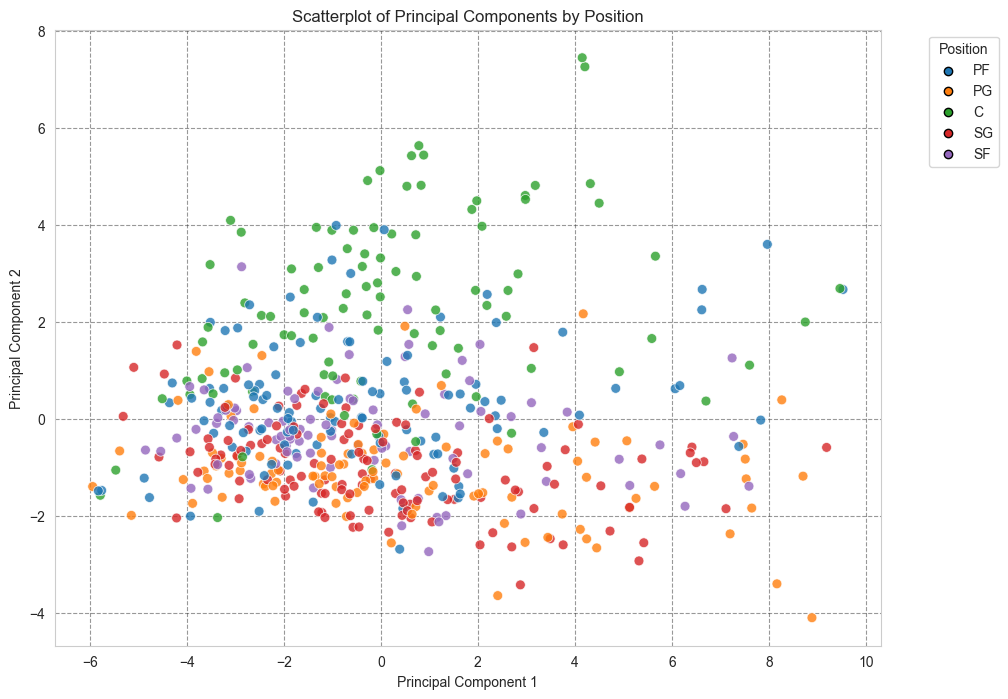

In [23]:
plt.figure(figsize=[14, 8])
# Create a scatterplot and set the color palette to a more contrasting one
ax = sns.scatterplot(
    x='component_1', 
    y='component_2', 
    hue='Pos', 
    data=c12, 
    palette='tab10', # More vibrant colors
    s=50, 
    alpha=0.8
)

# Improve grid visibility and style
ax.grid(True, linestyle='--', alpha=0.5)

# Move the legend outside the plot
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc=2)

# Set meaningful labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Scatterplot of Principal Components by Position')

# Adjust the aspect ratio
ax.set_aspect('equal', 'box')

# Increase font sizes for better readability
plt.rcParams.update({'font.size': 14})

# Add edge color to markers
for lh in ax.legend_.legendHandles: 
    lh.set_edgecolor('black')

### t - Distributed Stochastic Neighbor Embedding (t-SNE)


In [24]:
from sklearn.manifold import TSNE
X = df_m[perf_features]
X_embedded = TSNE(n_components=2, learning_rate='auto', init='pca', random_state = 21).fit_transform(X)
tsne_df = pd.DataFrame({'component_1': X_embedded[:,0], 'component_2': X_embedded[:,1]})

posi = df_m['Pos'].reset_index()
posi = posi.drop('index', axis = 1)
c12 = pd.concat([tsne_df, posi], axis = 1)
c12.head()

,component_1,component_2,Pos
0,-17.686178,11.995784,PF
1,-30.250507,4.451989,PG
2,5.295938,15.582145,C
3,26.876799,5.732455,C
4,11.898246,4.981588,C


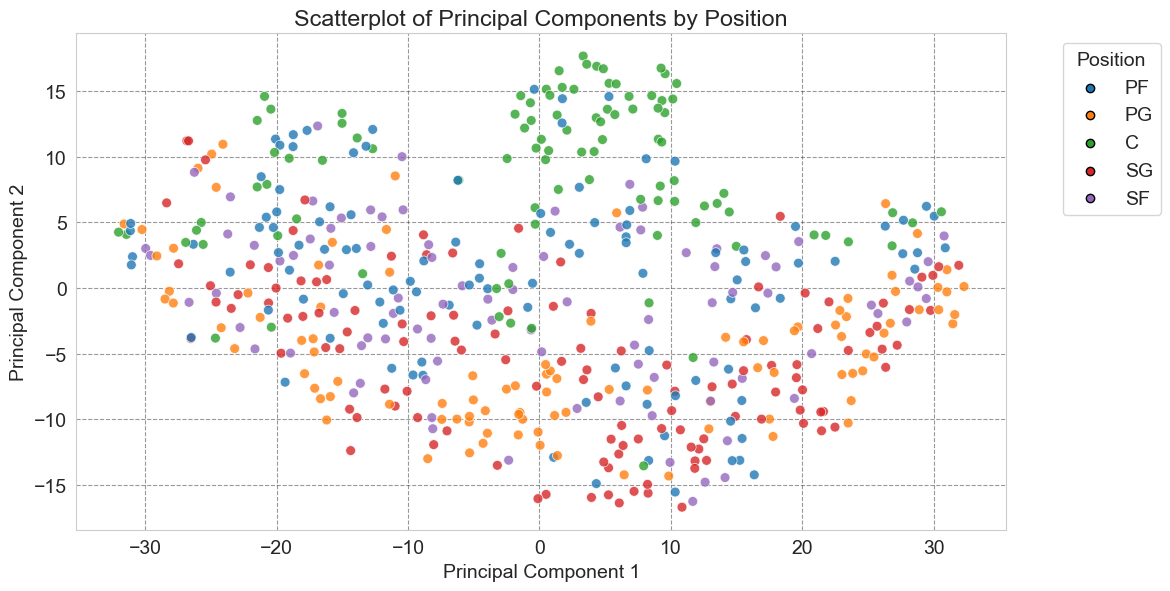

In [25]:
plt.figure(figsize=[12, 8])
# Create a scatterplot and set the color palette to a more contrasting one
ax = sns.scatterplot(
    x='component_1', 
    y='component_2', 
    hue='Pos', 
    data=c12, 
    palette='tab10', # More vibrant colors
    s=50, 
    alpha=0.8
)

# Improve grid visibility and style
ax.grid(True, linestyle='--', alpha=0.5)

# Move the legend outside the plot
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc=2)

# Set meaningful labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Scatterplot of Principal Components by Position')

# Adjust the aspect ratio
ax.set_aspect('equal', 'box')

# Increase font sizes for better readability
plt.rcParams.update({'font.size': 14})

# Add edge color to markers
for lh in ax.legend_.legendHandles: 
    lh.set_edgecolor('black')

### Elbow Method


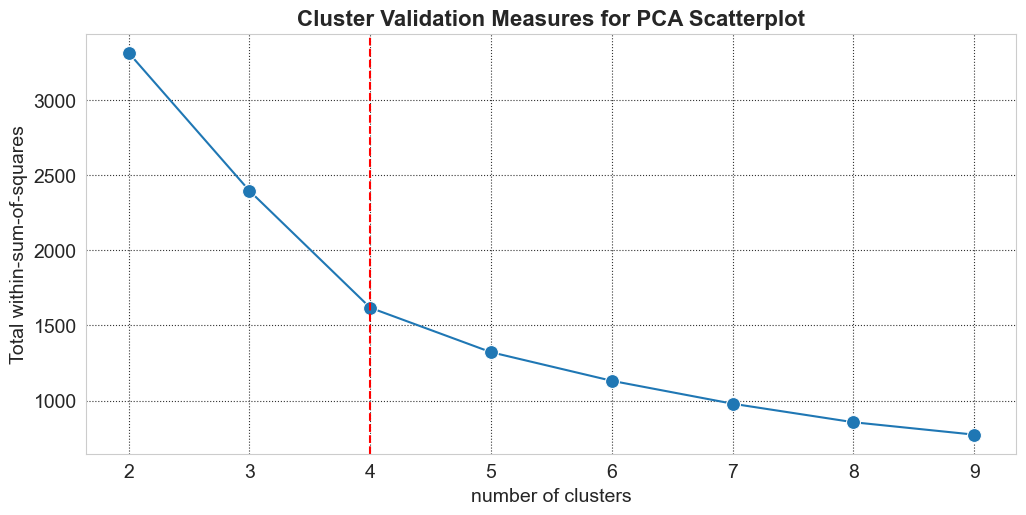

In [26]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter = 500)
    kmeans.fit(pca_df)
    ssd.append(kmeans.inertia_)

plt.figure(figsize = [12, 12])

plt.subplot(2,1,1)
with plt.style.context('seaborn-whitegrid'):
    sns.lineplot(np.arange(2,10,1), ssd, marker='o', markersize = 10)
    plt.xlabel('number of clusters', fontsize = 14)
    plt.axvline(4, ls="--", c="red")
    plt.ylabel('Total within-sum-of-squares', fontsize = 14)
    plt.title('Cluster Validation Measures for PCA Scatterplot', fontsize = 16, fontweight = 'bold')

### silhouette analysis

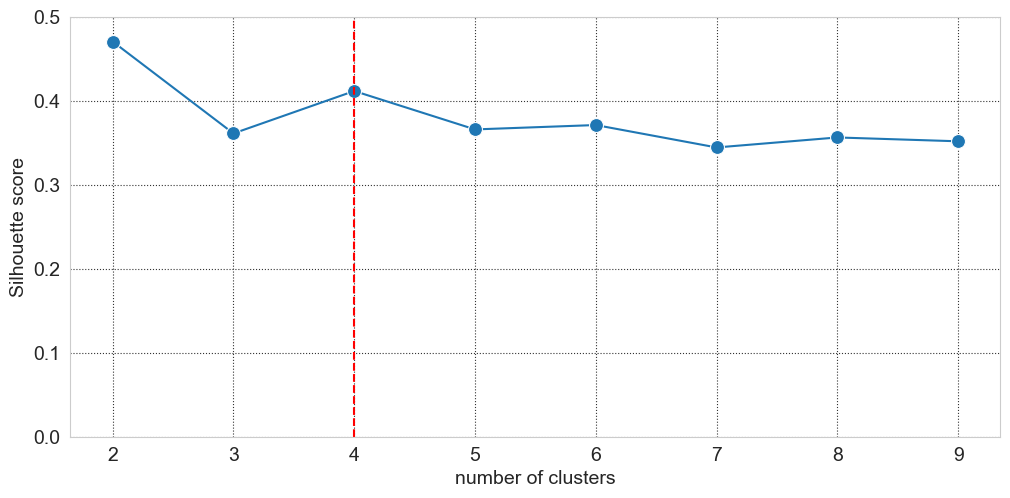

In [27]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
sil = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter = 500)
    kmeans.fit(pca_df)   
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    sil.append(silhouette_avg)

plt.figure(figsize = [12, 12])

plt.subplot(2,1,2)
with plt.style.context('seaborn-whitegrid'):
    sns.lineplot(np.arange(2,10,1), sil, marker='o', markersize = 10)
    plt.yticks(np.arange(0,0.6,0.1))
    plt.xlabel('number of clusters', fontsize = 14)
    plt.axvline(4, ls="--", c="red")
    plt.ylabel('Silhouette score', fontsize = 14)

## K-Means

In [28]:
#scaling the features

df_m = df_pmatch.copy()
df_m = df_m.fillna(0)
ss = StandardScaler()
df_m[perf_features] = ss.fit_transform(df_m[perf_features])
df_m.shape

(540, 20)

In [29]:
#model with k=4

X = df_m[perf_features]
kmeans = KMeans(n_clusters = 4, init='k-means++', max_iter = 1000, random_state = 25)
kmeans.fit(X)

KMeans(max_iter=1000, n_clusters=4, random_state=25)

In [30]:
df_clusters = df_pmatch.copy()

In [31]:
#assign the label
df_clusters['kmeans_id'] = kmeans.labels_
df_m['kmeans_id'] = kmeans.labels_

df_clusters.head()

,PTS,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,...,AST,STL,BLK,Pos,G,FG%,3P%,2P%,FT%,kmeans_id
26718,4.984,2.033,3.738,0.000,0.016,2.033,3.721,0.918,1.803,1.197,...,0.475,0.328,0.459,PF,61,0.544,0.000,0.546,0.509,0
26719,0.286,0.143,1.143,0.000,0.286,0.143,0.857,0.000,0.000,0.000,...,0.286,0.000,0.000,PG,7,0.125,0.000,0.167,NaN,3
26720,7.552,3.259,5.310,0.000,0.052,3.259,5.259,1.034,2.328,3.672,...,1.914,0.931,0.655,C,58,0.614,0.000,0.620,0.444,0
26721,18.703,7.125,12.500,0.031,0.125,7.094,12.375,4.422,5.531,2.219,...,5.406,1.172,1.031,C,64,0.570,0.250,0.573,0.799,1
26722,13.538,5.385,11.385,1.192,3.077,4.192,8.308,1.577,1.808,0.731,...,1.885,0.423,1.115,C,26,0.473,0.388,0.505,0.872,2


## Interpreting the Clusters

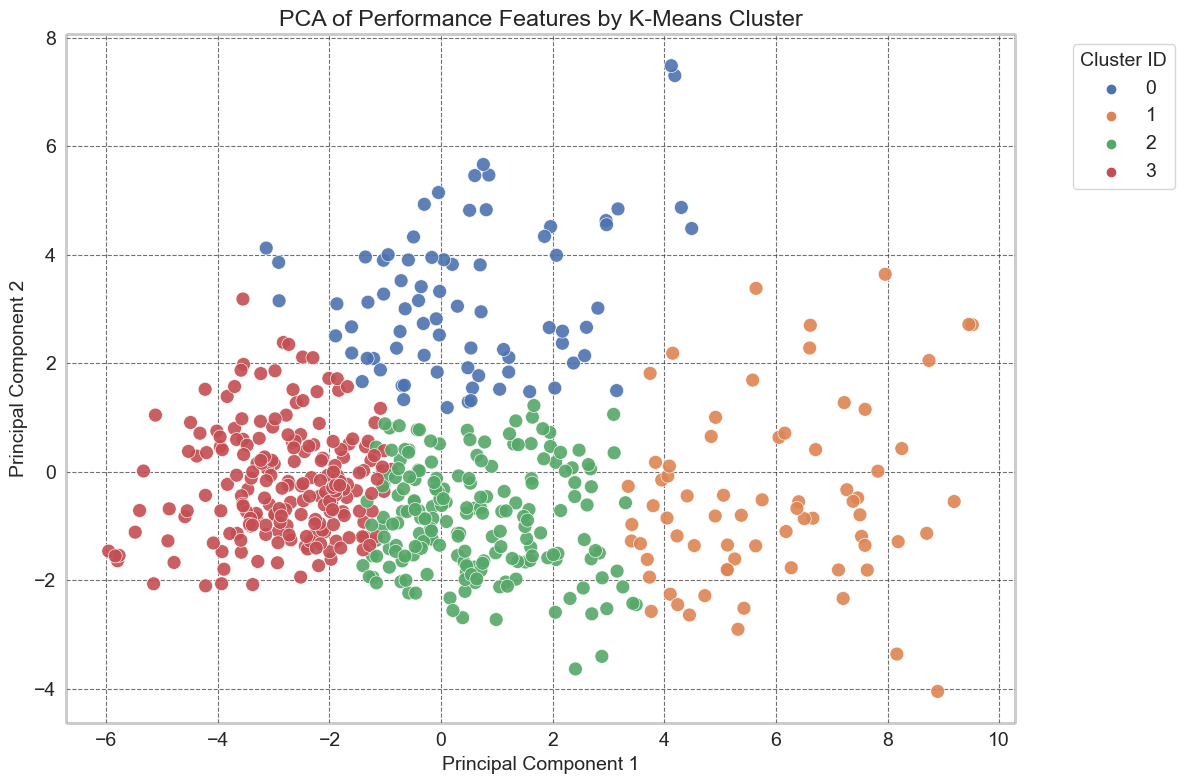

In [32]:

# Assuming df_m and perf_features are defined and kmeans is fitted
X = df_m[perf_features]
pca = PCA(n_components=2)
components = pca.fit_transform(X)
pca_df = pd.DataFrame({
    'component_1': components[:, 0], 
    'component_2': components[:, 1],
    'kmeans_id': kmeans.labels_
})

# Set the size of the plot
plt.figure(figsize=[12, 8])

# Create the scatterplot
ax = sns.scatterplot(
    x='component_1', 
    y='component_2', 
    hue='kmeans_id', 
    data=pca_df, 
    s=100, # Increased marker size for visibility
    alpha=0.9, # Adjust alpha for better visibility if needed
    palette='deep', # Color palette
    edgecolor='w', # White edge color for markers
    linewidth=0.5 # Line width for marker edges
)

# Improve the grid
ax.grid(True, linestyle='--', alpha=0.7)

# Move the legend outside the plot area
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc=2)

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of Performance Features by K-Means Cluster')

# Adjust aspect ratio
ax.set_aspect('auto')

# Increase font size
plt.rcParams.update({'font.size': 12})

# Add border around the plot
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1)

# Save the figure with a tight layout
plt.tight_layout()

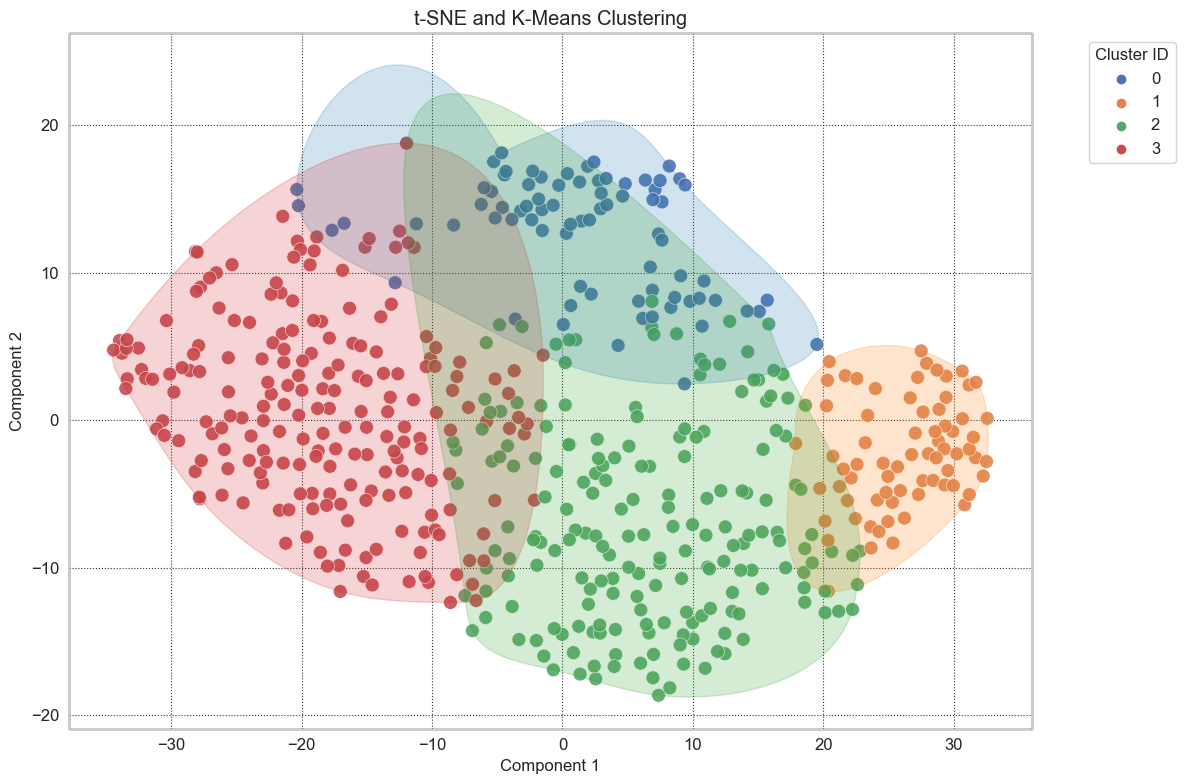

In [33]:
from scipy.spatial import ConvexHull
from scipy import interpolate

# Assuming df_m and perf_features are defined and kmeans is fitted
X = df_m[perf_features]
X_embedded = TSNE(n_components=2, learning_rate='auto', init='pca', random_state=21).fit_transform(X)
tsne_df = pd.DataFrame({'component_1': X_embedded[:, 0], 'component_2': X_embedded[:, 1]})
tsne_df['kmeans_id'] = kmeans.labels_

plt.figure(figsize=[12, 8])
ax = sns.scatterplot(
    x='component_1', 
    y='component_2', 
    hue='kmeans_id', 
    data=tsne_df, 
    s=100, # Increase marker size
    alpha=0.9, # Adjust alpha for better visibility
    palette='deep',
    edgecolor='w', # Add white edge color to markers
    linewidth=0.5
)

colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728']
for i in tsne_df['kmeans_id'].unique():
    points = tsne_df[tsne_df.kmeans_id == i][['component_1', 'component_2']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0])
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0])
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 200) # Use more points for smoother shape
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    plt.fill(interp_x, interp_y, c=colors[i], alpha=0.2) # Adjust alpha as necessary

# Improve the aesthetics of the figure
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1)
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc=2)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_title('t-SNE and K-Means Clustering')
plt.rcParams.update({'font.size': 12})

plt.tight_layout()
plt.show()


In [34]:
df_clusters.kmeans_id.value_counts()

3    202
2    191
0     77
1     70
Name: kmeans_id, dtype: int64

In [35]:
df_clusters.groupby('kmeans_id')[perf_features].mean().round(2)

,PTS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,AST,STL,BLK
kmeans_id,,,,,,,,,,,,,,,,,,
0,8.77,3.56,6.31,0.59,0.25,0.88,0.20,3.31,5.43,0.62,1.40,2.07,0.67,2.01,4.14,1.23,0.56,0.96
1,21.81,7.87,16.52,0.48,2.09,5.57,0.36,5.78,10.95,0.53,3.99,4.89,0.82,1.07,4.96,5.22,1.10,0.55
2,10.21,3.69,8.45,0.44,1.51,4.09,0.37,2.17,4.35,0.50,1.32,1.66,0.80,0.65,3.05,2.38,0.78,0.36
3,3.35,1.22,3.03,0.39,0.43,1.38,0.28,0.79,1.65,0.48,0.47,0.66,0.72,0.43,1.34,0.78,0.32,0.20


The Clusters can be interpreted as,

1. Cluster 0 (blue): ***The Bruiser***, moderate scorers, active players, excellent 2P shooting accuracy, very good offensive rebounds and good blocks.
2. Cluster 1 (orange): ***The Carry***, high scorers, very good 3P shooting, good 2P shooting and very good defensive rebounds.
3. Cluster 2 (green): ***The Marksmen***, moderate scorers, good 3P shooting accuracy, descent assists and best steals.
4. Cluster 3 (red): ***The Support***, relatively low scorers, descent 3P shooters, decent free-trow shooting accuracy.


## Relationship Between Clusters and NBA Team Success

In [36]:
df_2021.Tm.unique()

array(['MIA', 'MIL', 'NOP', 'TOT', 'PHO', 'MEM', 'LAL', 'POR', 'ORL',
       'TOR', 'CHI', 'WAS', 'UTA', 'SAC', 'CHO', 'NYK', 'DEN', 'SAS',
       'LAC', 'GSW', 'OKC', 'MIN', 'DET', 'DAL', 'IND', 'ATL', 'CLE',
       'HOU', 'BRK', 'BOS', 'PHI'], dtype=object)

In [37]:
tsne_df['Player'] = df_2021.Player.values
tsne_df['Team'] = df_2021.Tm.values
tsne_df.head()

,component_1,component_2,kmeans_id,Player,Team
0,-17.654879,12.891073,0,Precious Achiuwa,MIA
1,-32.502354,4.901277,3,Jaylen Adams,MIL
2,2.928564,14.346715,0,Steven Adams,NOP
3,27.923687,3.863824,1,Bam Adebayo,MIA
4,12.824335,6.713831,2,LaMarcus Aldridge,TOT


### Team Rank vs. Each Cluster

In [38]:
df_2021['cluster_id'] = df_m['kmeans_id']
df_2021

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,cluster_id
26718,2021,Precious Achiuwa,PF,21.0,MIA,61,4.0,737.0,124,228,...,19.5,0.3,1.0,1.3,0.085,-3.6,-0.5,-4.1,-0.4,0
26719,2021,Jaylen Adams,PG,24.0,MIL,7,0.0,18.0,1,8,...,18.6,-0.1,0.0,-0.1,-0.252,-15.1,-4.6,-19.8,-0.1,3
26720,2021,Steven Adams,C,27.0,NOP,58,58.0,1605.0,189,308,...,11.7,2.3,1.7,4.0,0.119,-0.4,0.1,-0.3,0.7,0
26721,2021,Bam Adebayo,C,23.0,MIA,64,64.0,2143.0,456,800,...,23.7,5.6,3.2,8.8,0.197,2.9,2.0,4.9,3.7,1
26722,2021,LaMarcus Aldridge,C,35.0,TOT,26,23.0,674.0,140,296,...,22.2,0.5,0.6,1.1,0.080,-0.2,-0.2,-0.3,0.3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27416,2021,Delon Wright,SG-PG,28.0,TOT,63,39.0,1748.0,240,518,...,16.3,2.5,1.8,4.3,0.117,0.6,1.5,2.2,1.8,2
27419,2021,Thaddeus Young,PF,32.0,CHI,68,23.0,1652.0,370,662,...,22.3,2.8,2.2,5.1,0.147,1.9,1.4,3.3,2.2,0
27420,2021,Trae Young,PG,22.0,ATL,63,63.0,2125.0,487,1112,...,33.0,5.9,1.3,7.2,0.163,5.3,-1.7,3.7,3.0,1
27421,2021,Cody Zeller,C,28.0,CHO,48,21.0,1005.0,181,324,...,18.3,2.1,1.1,3.3,0.156,-0.2,-0.2,-0.5,0.4,0


In [39]:
team_ranks = pd.read_csv('./data/team_rank.csv').iloc[:,:3]
team_ranks.head()

,Rk,Team,Tm
0,1,Phoenix Suns,PHO
1,2,Memphis Grizzlies,MEM
2,3,Miami Heat,MIA
3,4,Golden State Warriors,GSW
4,5,Dallas Mavericks,DAL


In [40]:
df_2021.Tm.unique()

array(['MIA', 'MIL', 'NOP', 'TOT', 'PHO', 'MEM', 'LAL', 'POR', 'ORL',
       'TOR', 'CHI', 'WAS', 'UTA', 'SAC', 'CHO', 'NYK', 'DEN', 'SAS',
       'LAC', 'GSW', 'OKC', 'MIN', 'DET', 'DAL', 'IND', 'ATL', 'CLE',
       'HOU', 'BRK', 'BOS', 'PHI'], dtype=object)

In [41]:
tdf = df_2021.merge(team_ranks, how = 'inner', on = 'Tm')
tdf.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,cluster_id,Rk,Team
0,2021,Precious Achiuwa,PF,21.0,MIA,61,4.0,737.0,124,228,...,1.0,1.3,0.085,-3.6,-0.5,-4.1,-0.4,0,3,Miami Heat
1,2021,Bam Adebayo,C,23.0,MIA,64,64.0,2143.0,456,800,...,3.2,8.8,0.197,2.9,2.0,4.9,3.7,1,3,Miami Heat
2,2021,Trevor Ariza,SF,35.0,MIA,30,27.0,841.0,99,241,...,1.0,1.6,0.091,-1.2,0.1,-1.1,0.2,2,3,Miami Heat
3,2021,Jimmy Butler,SF,31.0,MIA,52,52.0,1745.0,366,736,...,2.7,9.3,0.255,5.4,2.3,7.7,4.3,1,3,Miami Heat
4,2021,Dewayne Dedmon,C,31.0,MIA,16,0.0,210.0,46,65,...,0.4,1.1,0.256,1.2,0.5,1.7,0.2,0,3,Miami Heat


In [42]:
#fraction of players for each team in every cluster

for i in range(4):
    for t in tdf.Tm.unique():
        team_ranks.loc[team_ranks.Tm == t, 'cluster_{}'.format(i)] = tdf[tdf.Tm == t].cluster_id.map(lambda x: 1 if x == i else 0).mean()

In [43]:
team_ranks

,Rk,Team,Tm,cluster_0,cluster_1,cluster_2,cluster_3
0,1,Phoenix Suns,PHO,0.066667,0.133333,0.333333,0.466667
1,2,Memphis Grizzlies,MEM,0.176471,0.117647,0.411765,0.294118
2,3,Miami Heat,MIA,0.200000,0.133333,0.333333,0.333333
3,4,Golden State Warriors,GSW,0.187500,0.125000,0.437500,0.250000
4,5,Dallas Mavericks,DAL,0.133333,0.133333,0.333333,0.400000
5,6,Boston Celtics,BOS,0.214286,0.214286,0.142857,0.428571
6,7,Milwaukee Bucks,MIL,0.133333,0.200000,0.266667,0.400000
7,8,Philadelphia 76ers,PHI,0.055556,0.166667,0.277778,0.500000
8,9,Utah Jazz,UTA,0.125000,0.062500,0.375000,0.437500
9,10,Toronto Raptors,TOR,0.200000,0.200000,0.333333,0.266667


In [44]:
import statsmodels.api as sm

def build_model(col):
    tr = sm.add_constant(team_ranks['Rk'])
    lr = sm.OLS(team_ranks[col], tr).fit()
    return lr

In [52]:
def reg_plot(col):
    # Set the color for the dots to #1d428A and for the line to #C8102E
    # Make the line thicker by setting linewidth
    sns.regplot(
        x='Rk', 
        y=col, 
        data=team_ranks, 
        scatter_kws={'color': '#1d428A'}, 
        line_kws={'color': '#C8102E', 'linewidth': 3}
    )
    
    # Place text on the plot, adjust the position as needed
    plt.text(
        15, 
        max(team_ranks[col]) - 0.01, 
        'p={}'.format(build_model(col).pvalues[1].round(3)), 
        fontsize=15, 
        fontweight='bold',
        ha='center'  # center the text horizontally
    )
    
    plt.xlabel('Team Rank', fontsize=14)
    plt.ylabel('Fractions in {}'.format(col), fontsize=14)

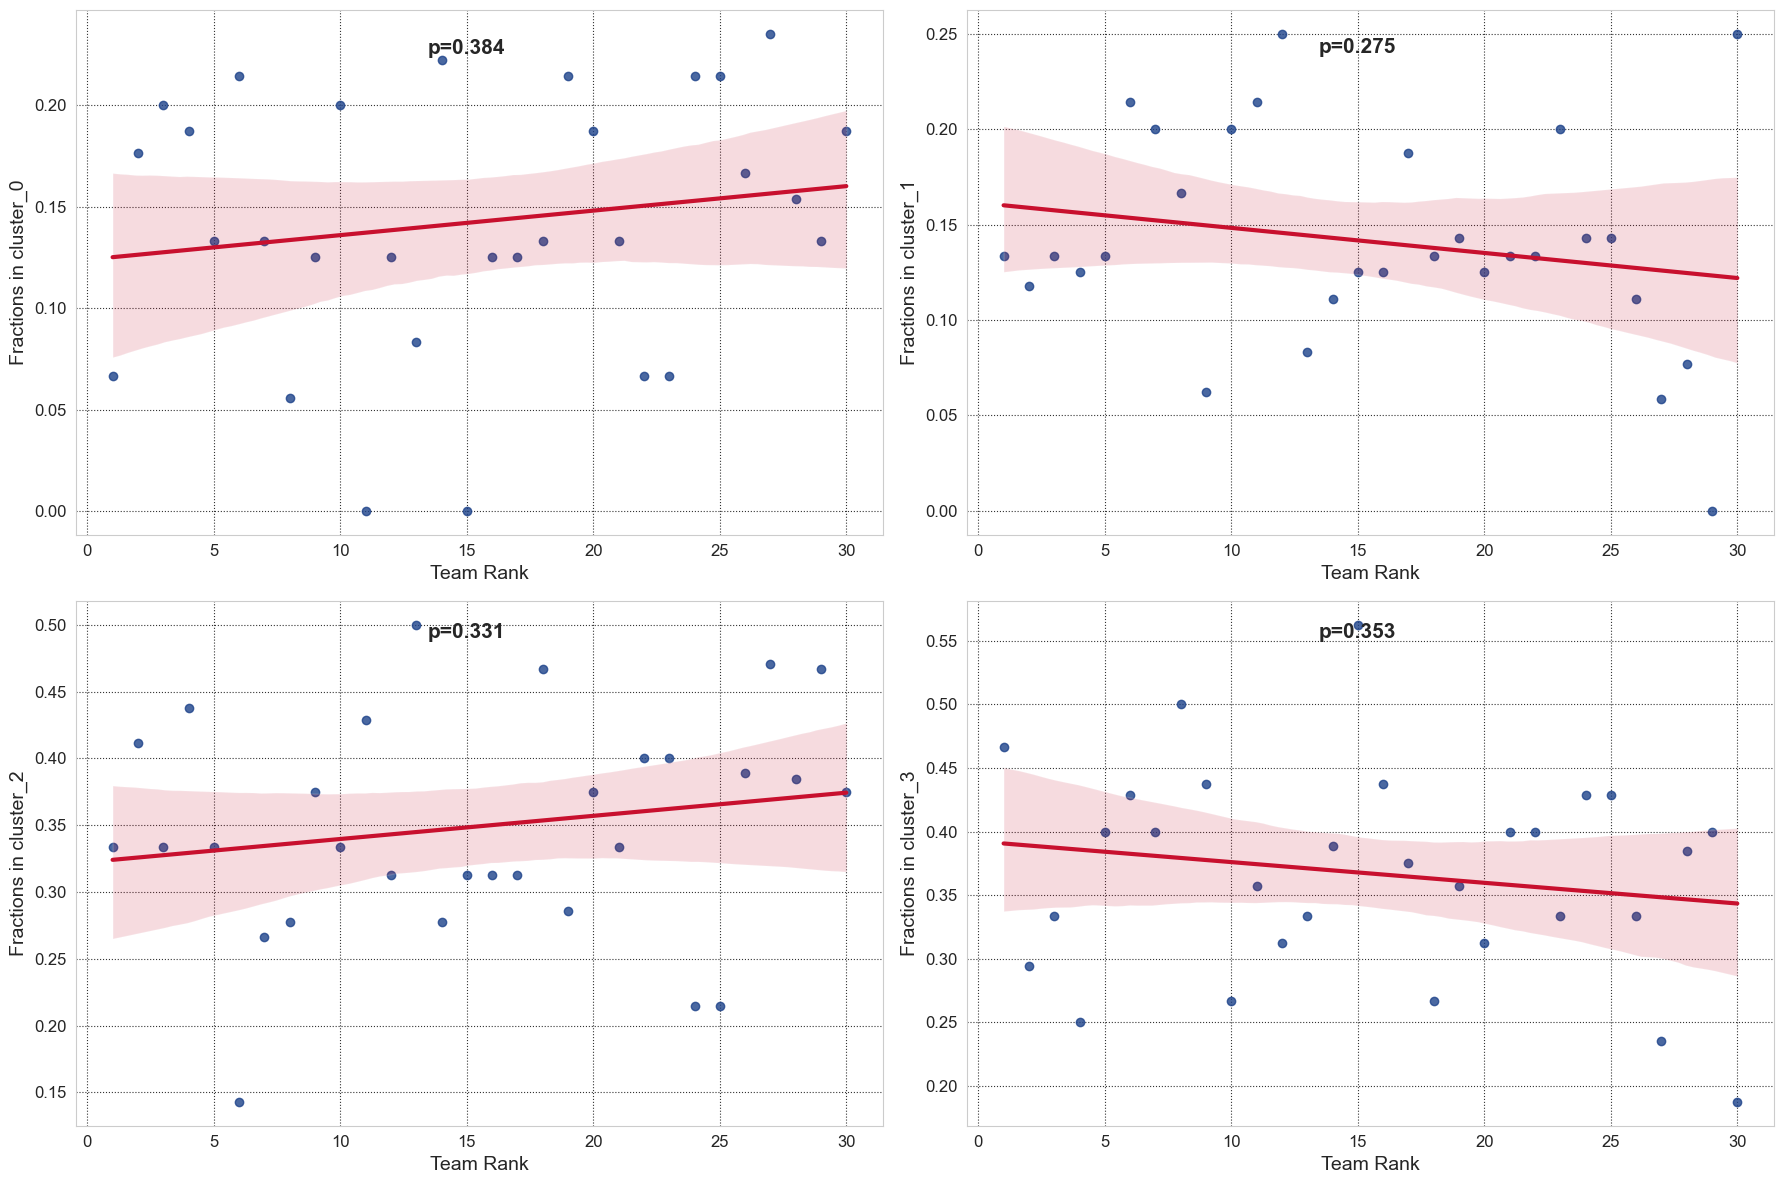

In [53]:
plt.figure(figsize = [18, 12])
plt.subplot(2,2,1)
reg_plot('cluster_0')
plt.subplot(2,2,2)
reg_plot('cluster_1')
plt.subplot(2,2,3)
reg_plot('cluster_2')
plt.subplot(2,2,4)
reg_plot('cluster_3')
plt.tight_layout()

### Average Variance and Mean Absolute Deviation of Teams

In [60]:
df_pmatch['Tm'] = df_2021['Tm']
df_pmatch['cluster_id'] = df_2021['cluster_id']

tdf = df_pmatch.merge(team_ranks, how = 'inner', on = 'Tm')

In [61]:
for t in tdf.Tm.unique():
    team_ranks.loc[team_ranks.Tm == t, 'team_variance'] = np.sqrt(np.mean(tdf.loc[tdf.Tm == t, perf_features].var()**2))

In [62]:
for i in range(tdf.shape[0]):
    tdf.loc[i, 'dist'] = np.sqrt(np.mean((tdf.loc[i, perf_features] - tdf.loc[tdf.Tm == tdf.loc[i,'Tm'], perf_features].mean())**2))

In [63]:
team_ranks = team_ranks.merge(tdf.groupby('Tm').dist.mean().reset_index(), how = 'inner', on = 'Tm')
team_ranks.head()

,Rk,Team,Tm,cluster_0,cluster_1,cluster_2,cluster_3,team_variance,dist_x,dist_y,dist
0,1,Phoenix Suns,PHO,0.066667,0.133333,0.333333,0.466667,11.563976,1.863678,1.863678,1.863678
1,2,Memphis Grizzlies,MEM,0.176471,0.117647,0.411765,0.294118,9.200423,1.827947,1.827947,1.827947
2,3,Miami Heat,MIA,0.200000,0.133333,0.333333,0.333333,10.838302,2.131086,2.131086,2.131086
3,4,Golden State Warriors,GSW,0.187500,0.125000,0.437500,0.250000,15.580470,2.092969,2.092969,2.092969
4,5,Dallas Mavericks,DAL,0.133333,0.133333,0.333333,0.400000,16.488184,2.237714,2.237714,2.237714


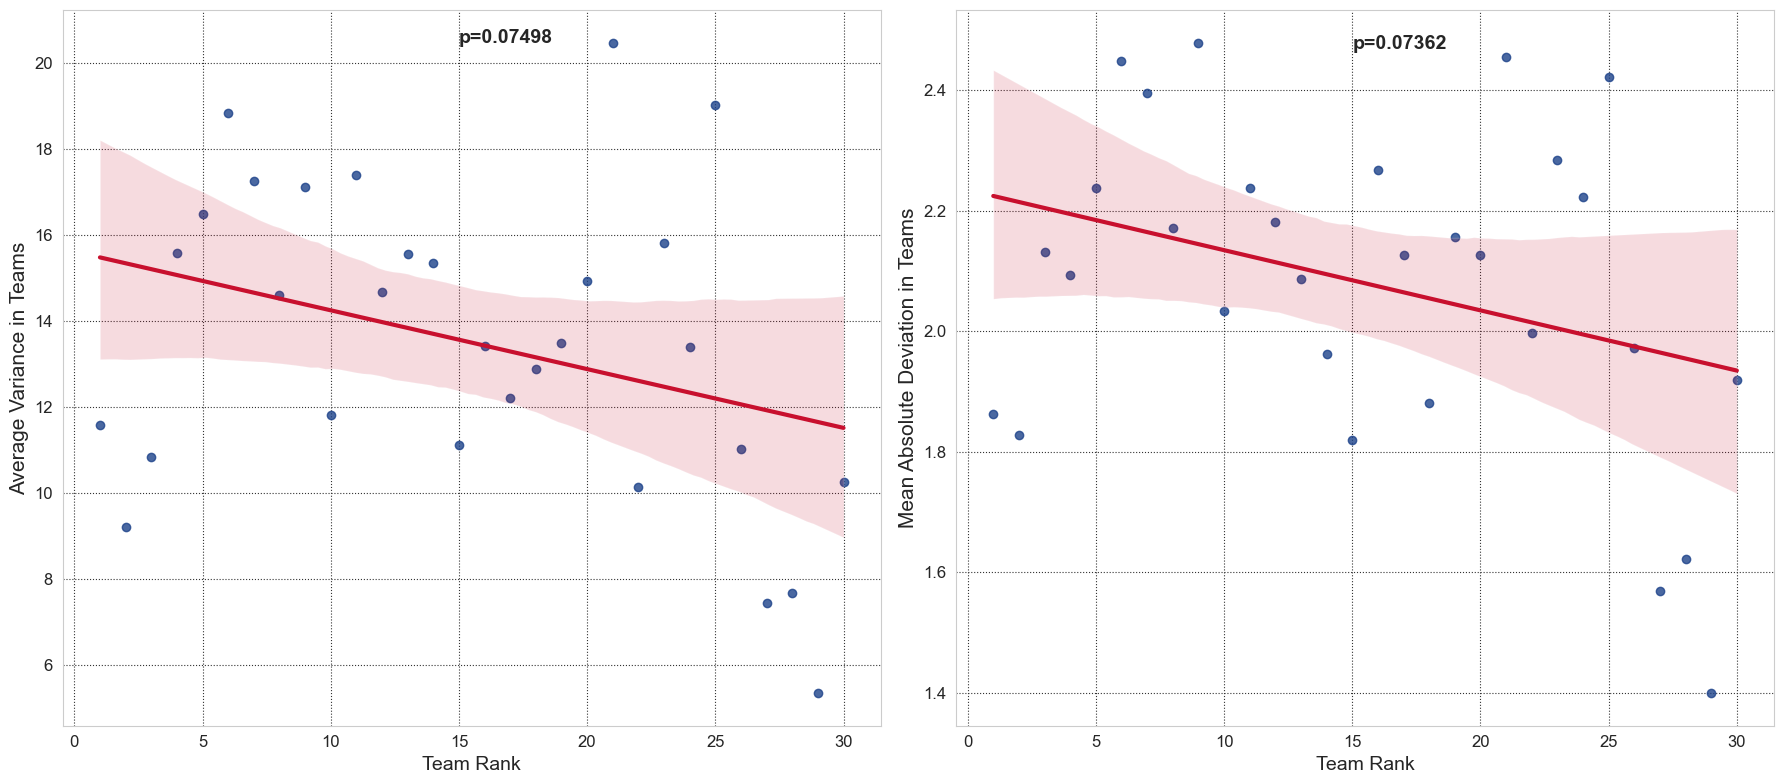

In [64]:
plt.figure(figsize = [18, 8])

#Average Variance in each dimention
plt.subplot(1,2,1)
sns.regplot(team_ranks['Rk'], team_ranks['team_variance'], scatter_kws={'color': '#1d428A'}, 
        line_kws={'color': '#C8102E', 'linewidth': 3})
plt.text(15, max(team_ranks['team_variance'])-0.01, 'p={}'.format(build_model('team_variance').pvalues[1].round(5)), fontsize = 14, fontweight = 'bold')
plt.xlabel('Team Rank', fontsize = 14)
plt.ylabel('Average Variance in Teams', fontsize = 15)

#Mean Absolute Deviation
plt.subplot(1,2,2)
sns.regplot(team_ranks['Rk'], team_ranks['dist'], scatter_kws={'color': '#1d428A'}, 
        line_kws={'color': '#C8102E', 'linewidth': 3})
plt.text(15, max(team_ranks['dist'])-0.01, 'p={}'.format(build_model('dist').pvalues[1].round(5)), fontsize = 14, fontweight = 'bold')
plt.xlabel('Team Rank', fontsize = 14)
plt.ylabel('Mean Absolute Deviation in Teams', fontsize = 15)

plt.tight_layout()